In [1]:
%matplotlib inline

import umap
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

In [2]:
c_icut = "#e4eaed"
c_icut2 = "#34495e"
c_rxnenum = "#065535"
c_rxnenum = "#cf9b00"
c_diversity = "#e74c3c"
c_maxdist = "#6a3d9a"

# NOTE: Dexom-default refers to the DEXOM Diversity-enum method
m_diversity = 'dexom-default'
m_maxdist = 'dexom-maxdist'
m_icut = 'dexom-icut'
m_rxnenum = 'dexom-rxnenum' # Reaction-enum

list_methods = [m_diversity, m_maxdist, m_rxnenum, m_icut]
list_colors = [c_diversity, c_maxdist, c_rxnenum, c_icut2]


pal_rxnenum = sns.color_palette([c_icut, c_rxnenum])
pal_dexom = sns.color_palette([c_icut, c_diversity])
pal_maxdist = sns.color_palette([c_icut, c_maxdist])
pal_icut = sns.color_palette([c_icut, c_icut2])

state = np.random.RandomState(seed=42)

In [3]:
def plot_embedding(ax, df_embedding, method, color, title):
    ax.set(aspect='equal')
    sns.scatterplot(x='UMAP1', y='UMAP2', data = df_embedding[['UMAP1','UMAP2']], ax = ax, linewidth=0,
                    alpha=background_alpha, color=c_icut, rasterized=True)
    df = df_embedding[df_embedding.method==method]
    sns.scatterplot(x='UMAP1', y='UMAP2', data = df, ax = ax, linewidth=0, alpha=method_alpha, color=color, rasterized=True)
    ax.set_title(title, fontsize=14)
    
def plot_distances(ax, df_distances, list_methods, list_colors, alpha=0.05):
    for m, c in zip(list_methods, list_colors):
        df_distances.loc[m, :].transpose().plot(color=c, alpha=alpha, legend=False, ax=ax)
        df_distances.loc[m, :].mean(axis=0).plot(color=c, style='--', ax=ax)

## DAG sampling

In [4]:
# NOTE: Results are exported using the exportResults.m script included in DEXOM

df_full_dag = pd.read_csv('results/dag/full/allSolutionsIntVar.csv.zip', header=None)

df_dag_methods = pd.read_csv('results/dag/sampling/allSolutionsIntVar.csv.zip', header=None)
df_labels_dag = pd.read_csv('results/dag/sampling/allSolutionLabels.csv.zip', header=None)

labels = ['full'] * df_full_dag.shape[0] + df_labels_dag.squeeze().values.tolist()

df_all_dag = pd.concat([df_full_dag, df_dag_methods], ignore_index=True)
embedding_dag = umap.UMAP(metric="hamming", random_state=state, n_neighbors=30, unique=True).fit_transform(df_all_dag)


df_embedding_dag = pd.DataFrame(embedding_dag, columns=['UMAP1','UMAP2'])
df_embedding_dag['method'] = labels
df_embedding_dag.head()

C:\Users\pablo\miniconda3\lib\site-packages\umap\umap_.py:1530: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


,UMAP1,UMAP2,method
0,9.935110,17.592024,full
1,8.301420,13.872597,full
2,10.009578,17.682180,full
3,10.001393,17.680794,full
4,10.000808,17.602768,full


In [5]:
mean_dist = pd.read_csv('results/dag/sampling/mean_dist.csv.zip', header=None)
mean_nn_dist = pd.read_csv('results/dag/sampling/mean_nn_dist.csv.zip', header=None)
method_labels = pd.read_csv('results/dag/sampling/dist_labels.csv.zip', header=None)


list_labels = method_labels.squeeze().values.tolist()

df_mean = mean_dist.transpose()
df_mean.columns = list_labels
df_mean = df_mean.transpose().loc[:, 10:]

df_nn_mean = mean_nn_dist.transpose()
df_nn_mean.columns = list_labels
df_nn_mean = df_nn_mean.transpose().loc[:, 10:]

In [6]:
df_nn_mean

,10,11,12,13,14,15,16,17,18,19,...,240,241,242,243,244,245,246,247,248,249
dexom-default,0.068796,0.060811,0.060291,0.059846,0.061261,0.059122,0.057234,0.057057,0.056899,0.055405,...,0.054390,0.054389,0.054388,0.054386,0.054385,0.054384,0.054382,0.054381,0.054380,0.054378
dexom-default,0.063882,0.063063,0.062370,0.059846,0.059459,0.057432,0.057234,0.057057,0.055477,0.056757,...,0.054278,0.054277,0.054276,0.054276,0.054275,0.054274,0.054273,0.054272,0.054271,0.054270
dexom-default,0.058968,0.058559,0.058212,0.057915,0.057658,0.057432,0.055644,0.054054,0.054054,0.054054,...,0.054278,0.054277,0.054276,0.054276,0.054275,0.054274,0.054273,0.054272,0.054271,0.054270
dexom-default,0.058968,0.063063,0.062370,0.061776,0.064865,0.064189,0.062003,0.060060,0.059744,0.060811,...,0.054839,0.054836,0.054833,0.054829,0.054826,0.054823,0.054820,0.054817,0.054814,0.054811
dexom-default,0.058968,0.058559,0.060291,0.057915,0.059459,0.057432,0.058824,0.057057,0.056899,0.056757,...,0.054615,0.054612,0.054610,0.054608,0.054606,0.054494,0.054492,0.054490,0.054488,0.054486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dexom-maxdist,0.076167,0.081081,0.083160,0.075290,0.070270,0.072635,0.074722,0.073574,0.072546,0.074324,...,0.054278,0.054277,0.054276,0.054276,0.054275,0.054274,0.054273,0.054272,0.054271,0.054270
dexom-maxdist,0.085995,0.083333,0.083160,0.083012,0.081081,0.082770,0.084261,0.076577,0.075391,0.077027,...,0.054839,0.054836,0.054833,0.054829,0.054826,0.054713,0.054711,0.054708,0.054705,0.054703
dexom-maxdist,0.071253,0.069820,0.068607,0.073359,0.075676,0.077703,0.076312,0.075075,0.073969,0.074324,...,0.054278,0.054277,0.054276,0.054276,0.054275,0.054274,0.054273,0.054272,0.054271,0.054270
dexom-maxdist,0.071253,0.069820,0.068607,0.071429,0.073874,0.076014,0.074722,0.073574,0.072546,0.074324,...,0.054390,0.054389,0.054388,0.054386,0.054385,0.054384,0.054382,0.054381,0.054380,0.054378


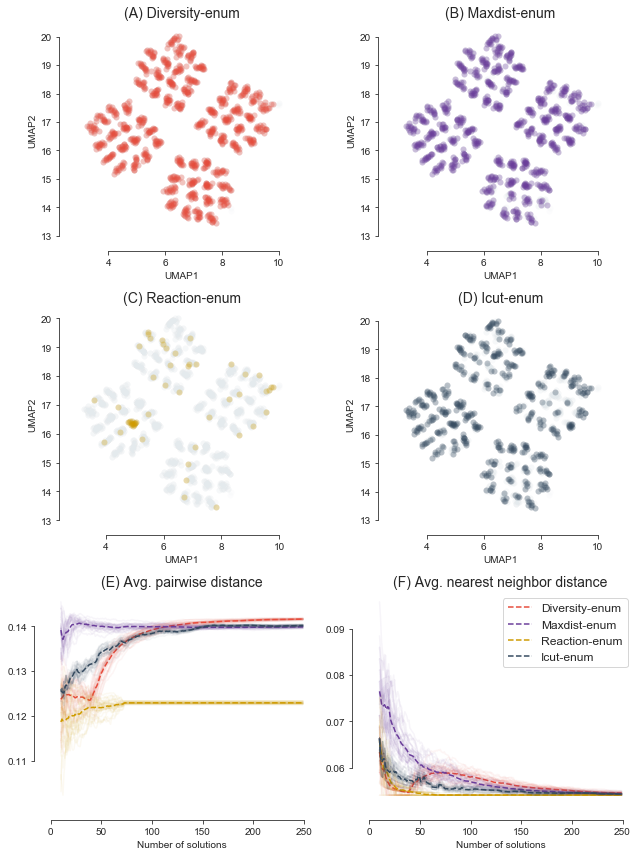

In [7]:
sns.set_style("ticks")

df_embedding = df_embedding_dag

fig, axs = plt.subplots(3, 2, figsize=(9, 12), sharey=False)

background_alpha = 0.1
method_alpha = 0.3

ax = axs[0,0]
plot_embedding(ax, df_embedding, m_diversity, c_diversity, '(A) Diversity-enum')

ax = axs[0,1]
plot_embedding(ax, df_embedding, m_maxdist, c_maxdist, '(B) Maxdist-enum')

ax = axs[1,0]
plot_embedding(ax, df_embedding, m_rxnenum, c_rxnenum, '(C) Reaction-enum')

ax = axs[1,1]
plot_embedding(ax, df_embedding, m_icut, c_icut2, '(D) Icut-enum')

# Plot the distance
ax = axs[2,0]

alpha = 0.05
#ax.set_ylim([0.080, 0.100])
plot_distances(ax, df_mean, list_methods, list_colors, alpha=alpha)
ax.set_title('(E) Avg. pairwise distance', fontsize=14)
ax.set_xlabel('Number of solutions')

ax = axs[2,1]
#ax.set_ylim([0.045, 0.08])
plot_distances(ax, df_nn_mean, list_methods, list_colors, alpha=alpha)
ax.set_title('(F) Avg. nearest neighbor distance', fontsize=14)
ax.set_xlabel('Number of solutions')

# Create a custom legend
l1 = mlines.Line2D([], [], color=c_diversity, linestyle='--', label='Diversity-enum')
l2 = mlines.Line2D([], [], color=c_maxdist, linestyle='--', label='Maxdist-enum')
l3 = mlines.Line2D([], [], color=c_rxnenum, linestyle='--', label='Reaction-enum')
l4 = mlines.Line2D([], [], color=c_icut2, linestyle='--', label='Icut-enum')
ax.legend(handles=[l1,l2,l3,l4], fontsize=12)

ax = axs[2,1]

sns.despine(offset=15, trim=True);
plt.tight_layout()

#fig.savefig('figures/dag1024.pdf')

## Yeast Random

In [8]:
folder = 'rand120x2'


df = pd.read_csv('results/yeast/random/{}/allSolutionsIntVar.csv.zip'.format(folder), header=None)
df_labels = pd.read_csv('results/yeast/random/{}/allSolutionLabels.csv.zip'.format(folder), header=None)

state = np.random.RandomState(seed=42)
embedding = umap.UMAP(metric="hamming", random_state=state, n_neighbors=30, unique=True).fit_transform(df)

df_embedding = pd.DataFrame(embedding, columns=['UMAP1','UMAP2'])
df_embedding['method'] = df_labels.squeeze().values.tolist()
df_embedding.head()

C:\Users\pablo\miniconda3\lib\site-packages\umap\umap_.py:1530: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


,UMAP1,UMAP2,method
0,13.021479,7.324783,cobra-imat/random
1,4.087590,6.207263,cobra-imat/random
2,9.925431,6.479264,cobra-imat/random
3,9.581128,8.843873,cobra-imat/random
4,11.859126,9.254138,cobra-imat/random


In [9]:
df_embedding.method.unique()

array(['cobra-imat/random', 'dexom-default', 'dexom-maxdist',
       'dexom-icut'], dtype=object)

In [10]:
mean_dist = pd.read_csv('results/yeast/random/{}/mean_dist.csv.zip'.format(folder), header=None)
mean_nn_dist = pd.read_csv('results/yeast/random/{}/mean_nn_dist.csv.zip'.format(folder), header=None)
method_labels = pd.read_csv('results/yeast/random/{}/dist_labels.csv.zip'.format(folder), header=None)


list_labels = method_labels.squeeze().values.tolist()

df_mean = mean_dist.transpose()
df_mean.columns = list_labels
df_mean = df_mean.transpose().loc[:, 10:1000]

df_nn_mean = mean_nn_dist.transpose()
df_nn_mean.columns = list_labels
df_nn_mean = df_nn_mean.transpose().loc[:, 10:1000]

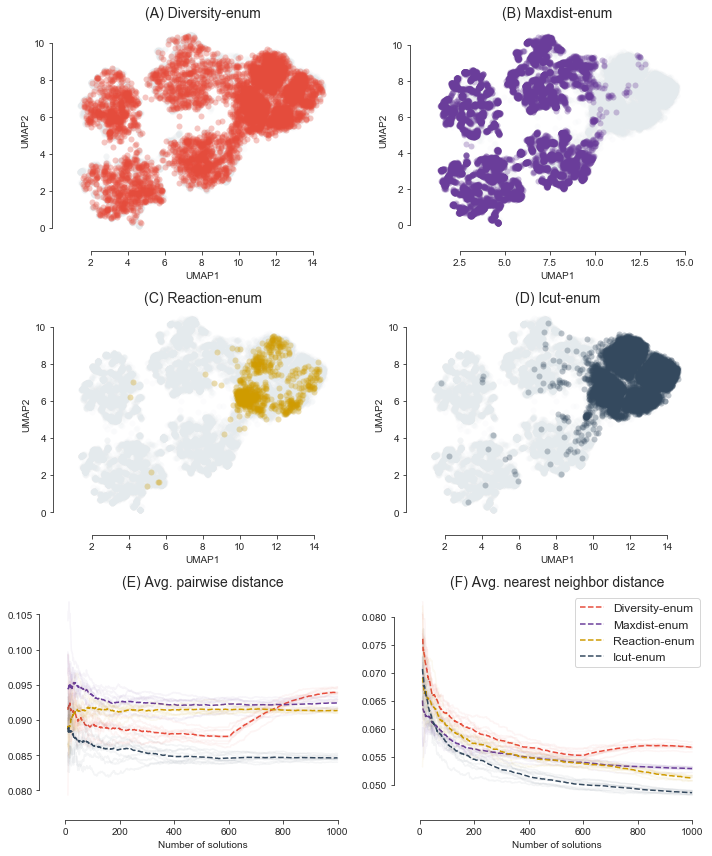

In [11]:
sns.set_style("ticks")

m_diversity = 'dexom-default'
m_maxdist = 'dexom-maxdist'
m_icut = 'dexom-icut'
m_rxnenum = 'dexom-rxnenum'
if m_rxnenum not in df_mean.index.unique().tolist():
    m_rxnenum = 'cobra-imat/random'

list_methods = [m_diversity, m_maxdist, m_rxnenum, m_icut]

fig, axs = plt.subplots(3, 2, figsize=(10, 12), sharey=False)

background_alpha = 0.1
method_alpha = 0.3

ax = axs[0,0]
plot_embedding(ax, df_embedding, m_diversity, c_diversity, '(A) Diversity-enum')

ax = axs[0,1]
plot_embedding(ax, df_embedding, m_maxdist, c_maxdist, '(B) Maxdist-enum')

ax = axs[1,0]
plot_embedding(ax, df_embedding, m_rxnenum, c_rxnenum, '(C) Reaction-enum')

ax = axs[1,1]
plot_embedding(ax, df_embedding, m_icut, c_icut2, '(D) Icut-enum')

# Plot the distance
ax = axs[2,0]

alpha = 0.05
#ax.set_ylim([0.080, 0.100])
plot_distances(ax, df_mean, list_methods, list_colors, alpha=alpha)
ax.set_title('(E) Avg. pairwise distance', fontsize=14)
ax.set_xlabel('Number of solutions')
#ax.legend(handles=[l1,l2,l3,l4], fontsize=12)

ax = axs[2,1]
#ax.set_ylim([0.045, 0.08])
plot_distances(ax, df_nn_mean, list_methods, list_colors, alpha=alpha)
ax.set_title('(F) Avg. nearest neighbor distance', fontsize=14)
ax.set_xlabel('Number of solutions')

# Create a custom legend
l1 = mlines.Line2D([], [], color=c_diversity, linestyle='--', label='Diversity-enum')
l2 = mlines.Line2D([], [], color=c_maxdist, linestyle='--', label='Maxdist-enum')
l3 = mlines.Line2D([], [], color=c_rxnenum, linestyle='--', label='Reaction-enum')
l4 = mlines.Line2D([], [], color=c_icut2, linestyle='--', label='Icut-enum')
ax.legend(handles=[l1,l2,l3,l4], fontsize=12)

ax = axs[2,1]

sns.despine(offset=15, trim=True);
plt.tight_layout()

#fig.savefig('figures/{}.pdf'.format(folder))

## Ensembles

In [12]:
import zipfile
import tempfile

sns.set(font_scale=1.25)

results_zip = 'results/yeast/essential_genes/yeast6-evaluation/dexom-yeast6-eval-export-csv.zip'

with tempfile.TemporaryDirectory() as tmpdir:
    print('Unzipping results in {}'.format(tmpdir))
    with zipfile.ZipFile(results_zip, 'r') as zip_ref:
        zip_ref.extractall(tmpdir)
        df_e = pd.read_csv('{}/dexom-evaluation.csv'.format(tmpdir))
        df_full_eval = pd.read_csv('{}/dexom-evaluation-full-table.csv'.format(tmpdir))
        df_t1_o = pd.read_csv('{}/time_th-0.10-0.90.csv'.format(tmpdir))
        df_t2_o = pd.read_csv('{}/time_th-0.25-0.75.csv'.format(tmpdir))


        
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Paired"))

# Rename methods
df_e.Method = df_e.Method.replace('dexom-default/norand', 'Diversity-enum')
df_e.Method = df_e.Method.replace('dexom-rxnenum/norand', 'Reaction-enum')
df_e.Method = df_e.Method.replace('dexom-maxdist', 'Maxdist-enum')
df_e.Method = df_e.Method.replace('dexom-icut', 'Icut-enum')

colors = {
    'Diversity-enum': c_diversity,
    'Icut-enum': c_icut2,
    'Maxdist-enum': c_maxdist,
    'Reaction-enum': c_rxnenum
}

df_e[df_e.Method == 'Diversity-enum']

Unzipping results in C:\Users\pablo\AppData\Local\Temp\tmp6gmnll97


,Condition,Medium,MinBiomassFlux,Thresholds_1,Thresholds_2,Method,Mode,MCC,F1,Accuracy,TPR,FPR,TP,FP,TN,FN
0,O2_20.9,full,0.0001,0.10,0.90,Diversity-enum,or,0.559640,0.791437,0.842222,0.723404,0.126404,136,90,622,52
4,O2_20.9,full,0.0001,0.10,0.85,Diversity-enum,or,0.587307,0.776488,0.863333,0.675532,0.087079,127,62,650,61
8,O2_20.9,full,0.0001,0.10,0.80,Diversity-enum,or,0.650404,0.807464,0.885556,0.712766,0.068820,134,49,663,54
12,O2_20.9,full,0.0001,0.10,0.75,Diversity-enum,or,0.584084,0.770409,0.863333,0.664894,0.084270,125,60,652,63
16,O2_20.9,full,0.0001,0.15,0.90,Diversity-enum,or,0.597192,0.803212,0.860000,0.728723,0.105337,137,75,637,51
20,O2_20.9,full,0.0001,0.15,0.85,Diversity-enum,or,0.623882,0.802138,0.874444,0.712766,0.082865,134,59,653,54
24,O2_20.9,full,0.0001,0.15,0.80,Diversity-enum,or,0.605514,0.793237,0.867778,0.702128,0.088483,132,63,649,56
28,O2_20.9,full,0.0001,0.15,0.75,Diversity-enum,or,0.651609,0.782089,0.890000,0.664894,0.050562,125,36,676,63
32,O2_20.9,full,0.0001,0.20,0.90,Diversity-enum,or,0.566324,0.791090,0.846667,0.718085,0.119382,135,85,627,53
36,O2_20.9,full,0.0001,0.20,0.85,Diversity-enum,or,0.568885,0.767410,0.856667,0.664894,0.092697,125,66,646,63


In [13]:
#pd.read_csv('./')

In [14]:
from sklearn import metrics

def get_auc(method='Diversity-enum', data=df_e):
    df_selection = data[data.Method == method].loc[:,  ['FPR', 'TPR']]
    df_selection = df_selection.append({'FPR': 0, 'TPR': 0}, ignore_index=True).append({'FPR': 1, 'TPR': 1}, ignore_index=True)
    values = df_selection.sort_values(by='FPR')
    return metrics.auc(values.FPR.to_numpy(), values.TPR.to_numpy())

def get_auc_all(data=df_e):
    return {m: np.round(get_auc(m, data=data), 3) for m in df_e.Method.unique().tolist()}      
    
aucs = get_auc_all()
aucs

{'Diversity-enum': 0.843,
 'Reaction-enum': 0.828,
 'Maxdist-enum': 0.72,
 'Icut-enum': 0.693}

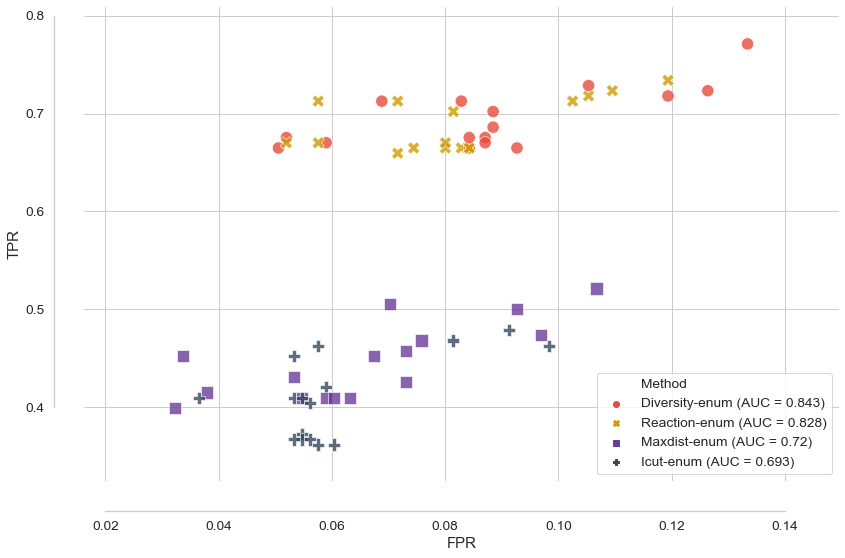

In [15]:
def plot_ensembles(data=df_e):
    fig, ax = plt.subplots(figsize=(12,8))
    aucs = get_auc_all(data=data)
    #ax.plot([0, 1], [0, 1], linestyle='--')
    #ax.set_xlim([0, 1.0])
    #ax.set_ylim([0.0, 0.85])
    g = sns.scatterplot(x="FPR", y="TPR", hue="Method", style="Method", data=data, s=150, alpha=0.8, ax=ax, palette=colors)
    sns.despine(offset=30, trim=True)
    for t in g.legend().texts: 
        if t.get_text() in aucs.keys():
            t.set_text(f"{t.get_text()} (AUC = {aucs[t.get_text()]})")

    return fig, ax
    
fig, ax = plot_ensembles()
plt.tight_layout()

#fig.savefig('figures/ensembles.pdf', format='pdf')

In [16]:
df_e[(df_e.Thresholds_1 == 0.25) & (df_e.Thresholds_2 == 0.75)]

,Condition,Medium,MinBiomassFlux,Thresholds_1,Thresholds_2,Method,Mode,MCC,F1,Accuracy,TPR,FPR,TP,FP,TN,FN
60,O2_20.9,full,0.0001,0.25,0.75,Diversity-enum,or,0.592425,0.777502,0.865556,0.675532,0.084270,127,60,652,61
61,O2_20.9,full,0.0001,0.25,0.75,Reaction-enum,or,0.596075,0.775468,0.867778,0.670213,0.080056,126,57,655,62
62,O2_20.9,full,0.0001,0.25,0.75,Maxdist-enum,or,0.417572,0.570478,0.828889,0.409574,0.060393,77,43,669,111
63,O2_20.9,full,0.0001,0.25,0.75,Icut-enum,or,0.430442,0.571509,0.833333,0.409574,0.054775,77,39,673,111


In [17]:
df_full_eval

,Condition,Medium,MinBiomassFlux,Thresholds_1,Thresholds_2,Method,Mode,MCC,F1,Accuracy,TPR,FPR,TP,FP,TN,FN
0,O2_20.9,full,0.0001,0.10,0.90,dexom-default/norand,single,0.402594,0.450183,0.833333,0.292553,0.023876,55,17,695,133
1,O2_20.9,full,0.0001,0.10,0.90,dexom-default/norand,single,0.395729,0.431322,0.832222,0.276596,0.021067,52,15,697,136
2,O2_20.9,full,0.0001,0.10,0.90,dexom-default/norand,single,0.405701,0.431594,0.834444,0.276596,0.018258,52,13,699,136
3,O2_20.9,full,0.0001,0.10,0.90,dexom-default/norand,single,0.399835,0.418660,0.833333,0.265957,0.016854,50,12,700,138
4,O2_20.9,full,0.0001,0.10,0.90,dexom-default/norand,single,0.416555,0.444437,0.836667,0.287234,0.018258,54,13,699,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108158,O2_20.9,full,0.0001,0.25,0.75,dexom-icut,single,0.446765,0.413141,0.842222,0.260638,0.004213,49,3,709,139
108159,O2_20.9,full,0.0001,0.25,0.75,dexom-icut,single,0.495032,0.489112,0.853333,0.324468,0.007022,61,5,707,127
108160,O2_20.9,full,0.0001,0.25,0.75,dexom-icut,union,0.466976,0.413502,0.845556,0.260638,0.000000,49,0,712,139
108161,O2_20.9,full,0.0001,0.25,0.75,dexom-icut,or,0.430442,0.571509,0.833333,0.409574,0.054775,77,39,673,111


In [18]:
df_full_eval.Method = df_full_eval.Method.replace('dexom-default/norand', 'Diversity-enum')
df_full_eval.Method = df_full_eval.Method.replace('dexom-rxnenum/norand', 'Reaction-enum')
df_full_eval.Method = df_full_eval.Method.replace('dexom-maxdist', 'Maxdist-enum')
df_full_eval.Method = df_full_eval.Method.replace('dexom-icut', 'Icut-enum')

# Discard the metabolic networks that are not able to make predictions of essential
# genes due to the fact that the biomass reaction has not been included or is blocked.
df_full_eval = df_full_eval[df_full_eval.TPR > 0.1]
df_full_eval

,Condition,Medium,MinBiomassFlux,Thresholds_1,Thresholds_2,Method,Mode,MCC,F1,Accuracy,TPR,FPR,TP,FP,TN,FN
0,O2_20.9,full,0.0001,0.10,0.90,Diversity-enum,single,0.402594,0.450183,0.833333,0.292553,0.023876,55,17,695,133
1,O2_20.9,full,0.0001,0.10,0.90,Diversity-enum,single,0.395729,0.431322,0.832222,0.276596,0.021067,52,15,697,136
2,O2_20.9,full,0.0001,0.10,0.90,Diversity-enum,single,0.405701,0.431594,0.834444,0.276596,0.018258,52,13,699,136
3,O2_20.9,full,0.0001,0.10,0.90,Diversity-enum,single,0.399835,0.418660,0.833333,0.265957,0.016854,50,12,700,138
4,O2_20.9,full,0.0001,0.10,0.90,Diversity-enum,single,0.416555,0.444437,0.836667,0.287234,0.018258,54,13,699,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108158,O2_20.9,full,0.0001,0.25,0.75,Icut-enum,single,0.446765,0.413141,0.842222,0.260638,0.004213,49,3,709,139
108159,O2_20.9,full,0.0001,0.25,0.75,Icut-enum,single,0.495032,0.489112,0.853333,0.324468,0.007022,61,5,707,127
108160,O2_20.9,full,0.0001,0.25,0.75,Icut-enum,union,0.466976,0.413502,0.845556,0.260638,0.000000,49,0,712,139
108161,O2_20.9,full,0.0001,0.25,0.75,Icut-enum,or,0.430442,0.571509,0.833333,0.409574,0.054775,77,39,673,111


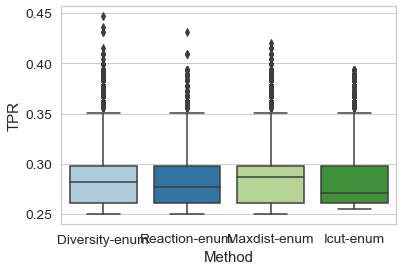

In [19]:
sns.boxplot(x="Method", y="TPR", data=df_full_eval[df_full_eval.Mode == "single"])

(0.0, 0.8)

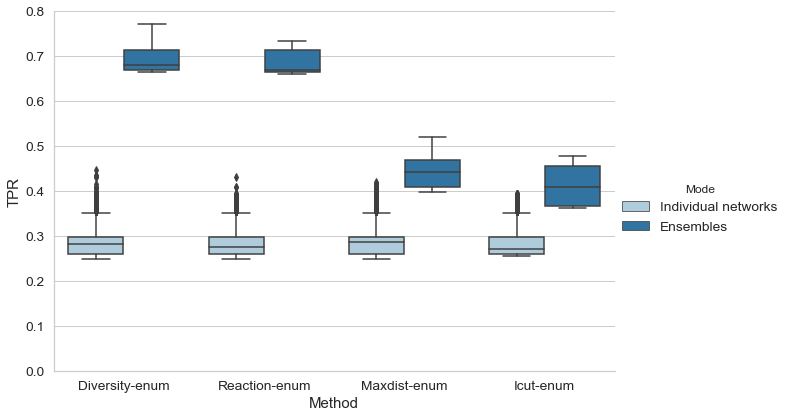

In [20]:
df_e2 = df_full_eval[(df_full_eval.Mode == "single") | (df_full_eval.Mode == "or")].copy()
df_e2.Mode = df_e2.Mode.replace('or', 'Ensembles')
df_e2.Mode = df_e2.Mode.replace('single', 'Individual networks')
fg = sns.catplot(x="Method", y="TPR", hue="Mode", data=df_e2, kind="box", height=6, aspect=1.5);
fg.ax.set_ylim([0.0, 0.8])

#fg.savefig('figures/tpr.pdf', format='pdf')

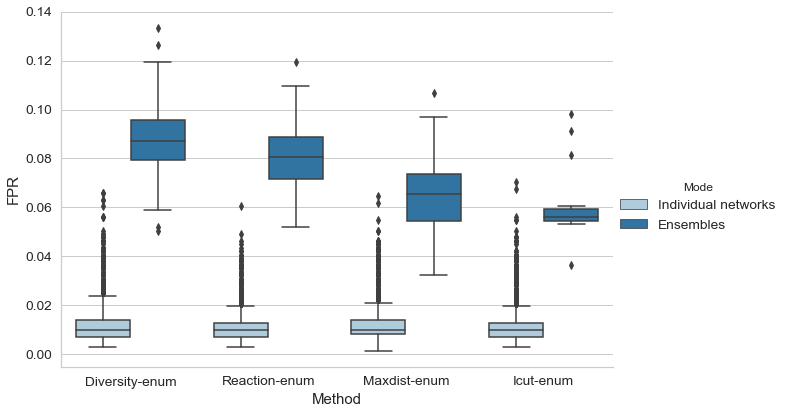

In [21]:
df_e2['specificity'] = 1 - df_e2.FPR
fg = sns.catplot(x="Method", y="FPR", hue="Mode", data=df_e2, kind="box", height=6, aspect=1.5);

#fg.savefig('figures/fpr.pdf', format='pdf')

## Time

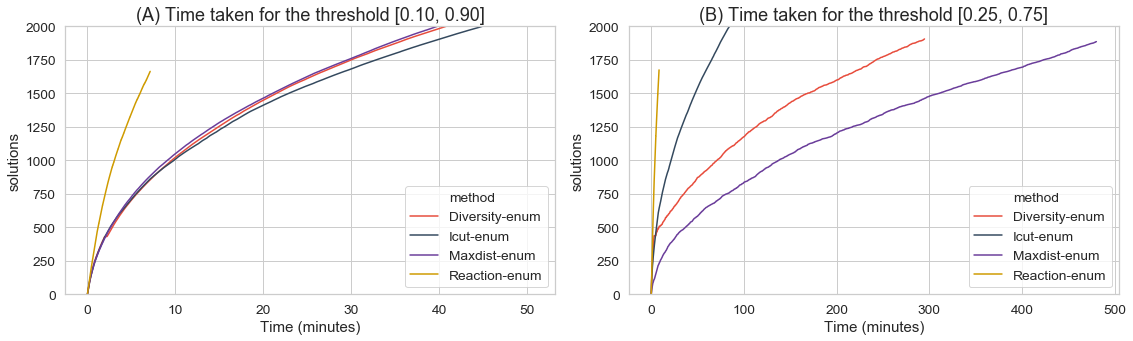

In [22]:
# Plot shows the accepted solutions over time, but this includes duplicated solutions that are 
# only filtered out after the algorithm finishes. Results
df_t1 = df_t1_o.copy()
df_t1.labels = df_t1.labels.replace('dexom-default/norand', 'Diversity-enum')
df_t1.labels = df_t1.labels.replace('dexom-icut', 'Icut-enum')
df_t1.labels = df_t1.labels.replace('dexom-maxdist', 'Maxdist-enum')
df_t1.labels = df_t1.labels.replace('dexom-rxnenum/norand', 'Reaction-enum')

df_t2 = df_t2_o.copy()
df_t2.labels = df_t2.labels.replace('dexom-default/norand', 'Diversity-enum')
df_t2.labels = df_t2.labels.replace('dexom-icut', 'Icut-enum')
df_t2.labels = df_t2.labels.replace('dexom-maxdist', 'Maxdist-enum')
df_t2.labels = df_t2.labels.replace('dexom-rxnenum/norand', 'Reaction-enum')

df_t1 = df_t1.rename(columns = {'labels': 'method'})
df_t2 = df_t2.rename(columns = {'labels': 'method'})

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(x='times', y='solutions', hue='method', data=df_t1, ax=ax[0], palette=colors)
ax[0].set_xlabel('Time (minutes)')
ax[0].set_ylim([0, 2000])
ax[0].set_title('(A) Time taken for the threshold [0.10, 0.90]', size=18)
sns.lineplot(x='times', y='solutions', hue='method', data=df_t2, ax=ax[1], palette=colors)
ax[1].set_xlabel('Time (minutes)')
ax[1].set_ylim([0, 2000])
ax[1].set_title('(B) Time taken for the threshold [0.25, 0.75]', size=18)
fig.tight_layout()

#fig.savefig('figures/time.pdf', format='pdf')

In [23]:
df_result_0990 = pd.read_csv('results/yeast/essential_genes/yeast6-evaluation/yeast-diversity-0990.csv.zip')
df_result_0990

,Condition,Medium,MinBiomassFlux,Thresholds_1,Thresholds_2,Method,Mode,MCC,F1,Accuracy,TPR,FPR,TP,FP,TN,FN
0,O2_20.9,full,0.0001,0.10,0.90,dexom-default/norand,or,0.563942,0.792588,0.844444,0.723404,0.123596,136,88,624,52
1,O2_20.9,full,0.0001,0.10,0.90,dexom-rxnenum/norand,or,0.588934,0.796707,0.857778,0.718085,0.105337,135,75,637,53
2,O2_20.9,full,0.0001,0.10,0.90,dexom-maxdist,or,0.405050,0.583297,0.822222,0.425532,0.073034,80,52,660,108
3,O2_20.9,full,0.0001,0.10,0.90,dexom-icut,or,0.426330,0.620146,0.824444,0.468085,0.081461,88,58,654,100
4,O2_20.9,full,0.0001,0.10,0.85,dexom-default/norand,or,0.597245,0.786403,0.865556,0.691489,0.088483,130,63,649,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,O2_20.9,full,0.0001,0.25,0.80,dexom-icut,or,0.471915,0.611968,0.843333,0.452128,0.053371,85,38,674,103
60,O2_20.9,full,0.0001,0.25,0.75,dexom-default/norand,or,0.588259,0.773967,0.864444,0.670213,0.084270,126,60,652,62
61,O2_20.9,full,0.0001,0.25,0.75,dexom-rxnenum/norand,or,0.596075,0.775468,0.867778,0.670213,0.080056,126,57,655,62
62,O2_20.9,full,0.0001,0.25,0.75,dexom-maxdist,or,0.417572,0.570478,0.828889,0.409574,0.060393,77,43,669,111


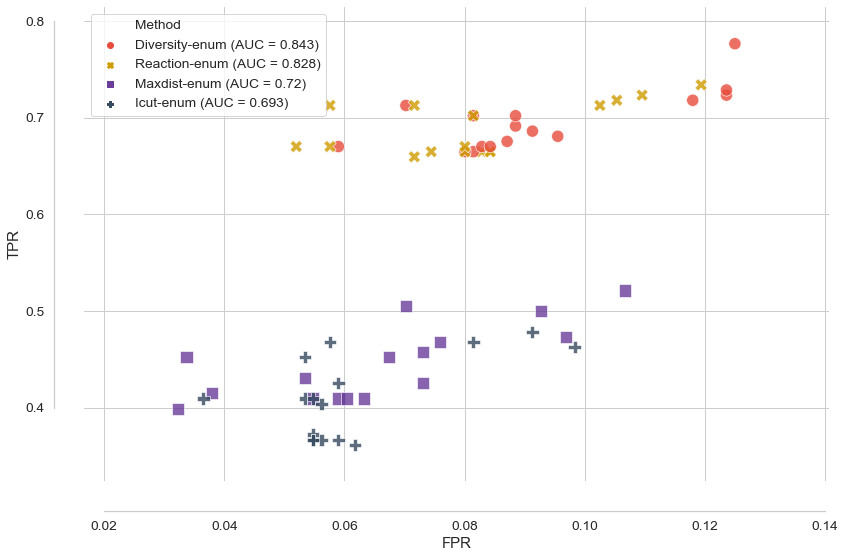

In [24]:
df_result_0990.Method = df_result_0990.Method.replace({'dexom-default/norand': 'Diversity-enum',
                                                       'dexom-rxnenum/norand': 'Reaction-enum',
                                                       'dexom-maxdist': 'Maxdist-enum',
                                                       'dexom-icut': 'Icut-enum'})

fig, ax = plot_ensembles(data=df_result_0990)
plt.tight_layout()

#fig.savefig('figures/ensembles-ds0990.pdf', format='pdf')

In [25]:
df_result_0999 = pd.read_csv('results/yeast/essential_genes/yeast6-evaluation/yeast-diversity-0999.csv.zip')
df_result_0999

,Condition,Medium,MinBiomassFlux,Thresholds_1,Thresholds_2,Method,Mode,MCC,F1,Accuracy,TPR,FPR,TP,FP,TN,FN
0,O2_20.9,full,0.0001,0.10,0.90,dexom-default/norand,or,0.559640,0.791437,0.842222,0.723404,0.126404,136,90,622,52
1,O2_20.9,full,0.0001,0.10,0.90,dexom-rxnenum/norand,or,0.588934,0.796707,0.857778,0.718085,0.105337,135,75,637,53
2,O2_20.9,full,0.0001,0.10,0.90,dexom-maxdist,or,0.405050,0.583297,0.822222,0.425532,0.073034,80,52,660,108
3,O2_20.9,full,0.0001,0.10,0.90,dexom-icut,or,0.426330,0.620146,0.824444,0.468085,0.081461,88,58,654,100
4,O2_20.9,full,0.0001,0.10,0.85,dexom-default/norand,or,0.592245,0.785355,0.863333,0.691489,0.091292,130,65,647,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,O2_20.9,full,0.0001,0.25,0.80,dexom-icut,or,0.471915,0.611968,0.843333,0.452128,0.053371,85,38,674,103
60,O2_20.9,full,0.0001,0.25,0.75,dexom-default/norand,or,0.588259,0.773967,0.864444,0.670213,0.084270,126,60,652,62
61,O2_20.9,full,0.0001,0.25,0.75,dexom-rxnenum/norand,or,0.596075,0.775468,0.867778,0.670213,0.080056,126,57,655,62
62,O2_20.9,full,0.0001,0.25,0.75,dexom-maxdist,or,0.417572,0.570478,0.828889,0.409574,0.060393,77,43,669,111


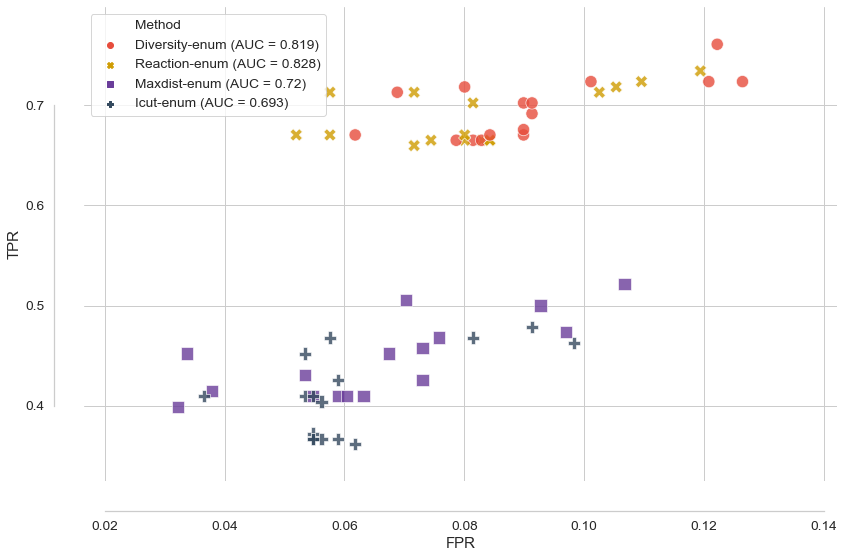

In [26]:
df_result_0999.Method = df_result_0999.Method.replace({'dexom-default/norand': 'Diversity-enum',
                                                       'dexom-rxnenum/norand': 'Reaction-enum',
                                                       'dexom-maxdist': 'Maxdist-enum',
                                                       'dexom-icut': 'Icut-enum'})
fig, ax = plot_ensembles(data=df_result_0999)
plt.tight_layout()

#fig.savefig('figures/ensembles-ds0999.pdf', format='pdf')

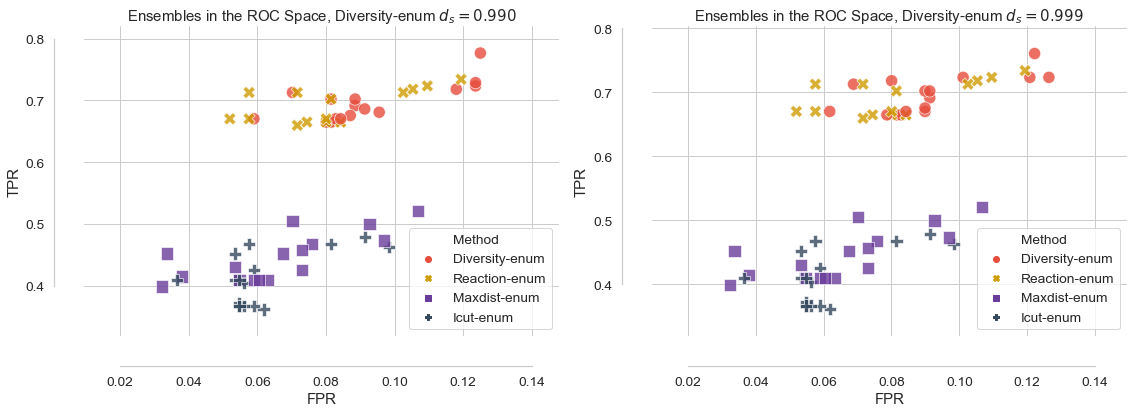

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
ax = axs[0]
ax.set_title('Ensembles in the ROC Space, Diversity-enum $d_s=0.990$')
sns.scatterplot(x="FPR", y="TPR", hue="Method", style="Method", data=df_result_0990, s=150, alpha=0.8, ax=ax, palette=colors)
ax = axs[1]
ax.set_title('Ensembles in the ROC Space, Diversity-enum $d_s=0.999$')
sns.scatterplot(x="FPR", y="TPR", hue="Method", style="Method", data=df_result_0999, s=150, alpha=0.8, ax=ax, palette=colors)
sns.despine(offset=30, trim=True)
plt.tight_layout()

#fig.savefig('figures/ensembles-ds0990-ds0999.pdf', format='pdf')